# 1. Time series manipulation

## 1.1. Datetime manipulation

In [1]:
import numpy as np
import pandas as pd

### Standard format
The complete datetime has the data type of <code style='font-size:13px;'>datetime64</code> and the format can be either <code style='font-size:13px;'>YYYY-MM-DD</code> or <code style='font-size:13px;'>YYYY-MM-DD hh:mm:ss</code>. This column can be used to detach year, quarter, month,... and the cyclic fields.

To quickly create a date or time column, use the <code style='font-size:13px;'>pd.date_range()</code> function with the <code style='font-size:13px;'>freq</code> parameter indicating the frequency of the date. The <code style='font-size:13px;'>freq</code> parameter support a number of [aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases).

In [8]:
seqMS = pd.date_range('2020-01-01', '2020-12-31', freq='MS')[:5]
seq3h = pd.date_range('2020-01-01', '2020-12-31', freq='3h')[:5]
pd.DataFrame({
    'month_start': seqMS,
    'time_3h': seq3h,
})

,month_start,time_3h
0,2020-01-01,2020-01-01 00:00:00
1,2020-02-01,2020-01-01 03:00:00
2,2020-03-01,2020-01-01 06:00:00
3,2020-04-01,2020-01-01 09:00:00
4,2020-05-01,2020-01-01 12:00:00


### Useful techniques

In [4]:
dfDate = pd.DataFrame({
    'day': [1, 2, 3],
    'month': [1, 1, 1],
    'year': [2020, 2020, 2020]
})

# combine three columns "day", "month" and "year"
dfDate.assign(date=pd.to_datetime(dfDate[['day', 'month', 'year']]))

,day,month,year,date
0,1,1,2020,2020-01-01
1,2,1,2020,2020-01-02
2,3,1,2020,2020-01-03


In [5]:
sequence = pd.date_range('2020-01-01', '2020-12-31', freq='17h 36t 43s')
dfDate = pd.DataFrame({'time': sequence}).head()
dfDate.assign(date=dfDate.time.dt.date)

,time,date
0,2020-01-01 00:00:00,2020-01-01
1,2020-01-01 17:36:43,2020-01-01
2,2020-01-02 11:13:26,2020-01-02
3,2020-01-03 04:50:09,2020-01-03
4,2020-01-03 22:26:52,2020-01-03


### Formatting date

In [6]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='25D')})
dfDate.assign(date_print=dfDate.date.dt.strftime('%d/%m/%y')).head()

,date,date_print
0,2020-01-01,01/01/20
1,2020-01-26,26/01/20
2,2020-02-20,20/02/20
3,2020-03-16,16/03/20
4,2020-04-10,10/04/20


### Extracting date part

In [7]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})

dfDate\
    .assign(year=dfDate.date.dt.to_period('Y').astype(str))\
    .assign(quarter=dfDate.date.dt.to_period('Q').astype(str).str.replace('Q', '-'))\
    .assign(month=dfDate.date.dt.to_period('M').astype(str))\
    .assign(week=dfDate.date.dt.strftime('%Y-%U'))

,date,year,quarter,month,week
0,2020-01-01 00:00:00,2020,2020-1,2020-01,2020-00
1,2020-03-10 10:40:00,2020,2020-1,2020-03,2020-10
2,2020-05-18 21:20:00,2020,2020-2,2020-05,2020-20
3,2020-07-27 08:00:00,2020,2020-3,2020-07,2020-30
4,2020-10-04 18:40:00,2020,2020-4,2020-10,2020-40
5,2020-12-13 05:20:00,2020,2020-4,2020-12,2020-50


### Extracting cyclic attributes

In [8]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})

dfDate\
    .assign(weekday=dfDate.date.dt.day_name())\
    .assign(day_of_year=dfDate.date.dt.dayofyear)\
    .assign(month_of_year=dfDate.date.dt.month)\
    .assign(quarter_of_year=dfDate.date.dt.quarter)

,date,weekday,day_of_year,month_of_year,quarter_of_year
0,2020-01-01 00:00:00,Wednesday,1,1,1
1,2020-03-10 10:40:00,Tuesday,70,3,1
2,2020-05-18 21:20:00,Monday,139,5,2
3,2020-07-27 08:00:00,Monday,209,7,3
4,2020-10-04 18:40:00,Sunday,278,10,4
5,2020-12-13 05:20:00,Sunday,348,12,4


### Rounding date
The <code style='font-size:13px;'>freq</code> parameter of the <code style='font-size:13px;'>Series.dt.round()</code> method uses the same aliases mentioned earlier.

In [9]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})
dfDate.assign(date_trunc=dfDate.date.dt.round(freq='h'))

,date,date_trunc
0,2020-01-01 00:00:00,2020-01-01 00:00:00
1,2020-03-10 10:40:00,2020-03-10 11:00:00
2,2020-05-18 21:20:00,2020-05-18 21:00:00
3,2020-07-27 08:00:00,2020-07-27 08:00:00
4,2020-10-04 18:40:00,2020-10-04 19:00:00
5,2020-12-13 05:20:00,2020-12-13 05:00:00


However, the <code style='font-size:13px;'>Series.dt.round()</code> method only works with fixed frequencies such as hour, minute, second. For rounding to date or month, use the <code style='font-size:13px;'>Series.dt.to_period()</code> method.

In [11]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})
dfDate.assign(date_trunc=dfDate.date.dt.to_period('M').dt.to_timestamp())

,date,date_trunc
0,2020-01-01 00:00:00,2020-01-01
1,2020-03-10 10:40:00,2020-03-01
2,2020-05-18 21:20:00,2020-05-01
3,2020-07-27 08:00:00,2020-07-01
4,2020-10-04 18:40:00,2020-10-01
5,2020-12-13 05:20:00,2020-12-01


### Timedelta

In [9]:
dfDelta = pd.DataFrame({
    'date1': pd.date_range('2020-01-01', '2020-01-31', freq='3D'),
    'date2': pd.date_range('2020-01-02', '2020-03-15', freq='W')
})
dfDelta['timedelta'] = dfDelta.date2 - dfDelta.date1
dfDelta['date3'] = dfDelta.date1 + pd.Timedelta('15 days')
dfDelta

,date1,date2,timedelta,date3
0,2020-01-01,2020-01-05,4 days,2020-01-16
1,2020-01-04,2020-01-12,8 days,2020-01-19
2,2020-01-07,2020-01-19,12 days,2020-01-22
3,2020-01-10,2020-01-26,16 days,2020-01-25
4,2020-01-13,2020-02-02,20 days,2020-01-28
5,2020-01-16,2020-02-09,24 days,2020-01-31
6,2020-01-19,2020-02-16,28 days,2020-02-03
7,2020-01-22,2020-02-23,32 days,2020-02-06
8,2020-01-25,2020-03-01,36 days,2020-02-09
9,2020-01-28,2020-03-08,40 days,2020-02-12


## 1.2. Time series filling
A time series may have no existing blank value, however, it doesn't mean that date column is completed. A completed time series requires all data points to be equally spaced. In other words, the date or time frequency should be a constant across the dataset. Interpolation (the process of inferring new values from given ones) is a great technique filling missing time series.

In [1]:
import numpy as np
import pandas as pd

In [3]:
dfPrice = pd.DataFrame({
    'date': pd.to_datetime([
        '2020-01-01', '2020-01-03', '2020-01-04', '2020-01-05',
        '2020-01-06', '2020-01-07', '2020-01-09', '2020-01-10'
    ]),
    'price': [110, 113, 112, 115, 118, 120, 118, 116]
})

### Unhiding missing data

In [4]:
dfPrice = dfPrice.set_index('date').asfreq('d').reset_index()
dfPrice

,date,price
0,2020-01-01,110.0
1,2020-01-02,NaN
2,2020-01-03,113.0
3,2020-01-04,112.0
4,2020-01-05,115.0
5,2020-01-06,118.0
6,2020-01-07,120.0
7,2020-01-08,NaN
8,2020-01-09,118.0
9,2020-01-10,116.0


### Neighbor filling
Two approaches:
- Foward filling: $s_t\leftarrow s_{t-1}$
- Backward filling: $s_t\leftarrow s_{t+1}$

In [5]:
forward = dfPrice.price.fillna(method='ffill')
backward = dfPrice.price.fillna(method='bfill')
dfPrice.assign(forward=forward, backward=backward)

,date,price,forward,backward
0,2020-01-01,110.0,110.0,110.0
1,2020-01-02,NaN,110.0,113.0
2,2020-01-03,113.0,113.0,113.0
3,2020-01-04,112.0,112.0,112.0
4,2020-01-05,115.0,115.0,115.0
5,2020-01-06,118.0,118.0,118.0
6,2020-01-07,120.0,120.0,120.0
7,2020-01-08,NaN,120.0,118.0
8,2020-01-09,118.0,118.0,118.0
9,2020-01-10,116.0,116.0,116.0


### Linear interpolating
This is a family of interpolation, where the simplest strategy is:

$$s_t\leftarrow \frac{s_{t-1}+s_{t+1}}{2}$$

In [20]:
filled_values = dfPrice.price.interpolate(method='linear')
dfPrice.assign(price=filled_values)

,date,price
0,2020-01-01,110.0
1,2020-01-02,111.5
2,2020-01-03,113.0
3,2020-01-04,112.0
4,2020-01-05,115.0
5,2020-01-06,118.0
6,2020-01-07,120.0
7,2020-01-08,119.0
8,2020-01-09,118.0
9,2020-01-10,116.0


## 1.3. Time series calculation

In [21]:
import pandas as pd
import numpy as np

### Cumulative sum
[Cumulative sum](https://en.wikipedia.org/wiki/Running_total) is the discrete version of [antiderivative](https://en.wikipedia.org/wiki/Antiderivative), the transformed series $\mathbf{s}'$ satisfies:

$$s'_t=s_1+s_2+\dots+s_t$$

In [22]:
dfPurchase = pd.DataFrame({
    'date': pd.date_range(start='1/1/2000', periods=12),
    'quantity': [10, 13, 11, 12, 8, 9, 9, 11, 10, 11, 13, 14]
})

dfPurchase['quantity_cumulative'] = dfPurchase.quantity.cumsum()
dfPurchase

,date,quantity,quantity_cumulative
0,2000-01-01,10,10
1,2000-01-02,13,23
2,2000-01-03,11,34
3,2000-01-04,12,46
4,2000-01-05,8,54
5,2000-01-06,9,63
6,2000-01-07,9,72
7,2000-01-08,11,83
8,2000-01-09,10,93
9,2000-01-10,11,104


### Differencing
[Differencing](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average#Differencing) is the discrete version of [derivative](https://en.wikipedia.org/wiki/Derivative), in which the transformed series $\mathbf{s}'$ is given by:

$$s_t'=s_t-s_{t-1}$$

In [6]:
import numpy as np
import pandas as pd

In [7]:
dfPurchase = pd.DataFrame({
    'date': pd.date_range(start='1/1/2000', periods=12),
    'quantity': [10, 13, 11, 12, 8, 9, 9, 11, 10, 11, 13, 14]
})

dfPurchase['quantity_difference'] = dfPurchase.quantity.diff(periods=2)
dfPurchase.head(10)

,date,quantity,quantity_difference
0,2000-01-01,10,NaN
1,2000-01-02,13,NaN
2,2000-01-03,11,1.0
3,2000-01-04,12,-1.0
4,2000-01-05,8,-3.0
5,2000-01-06,9,-3.0
6,2000-01-07,9,1.0
7,2000-01-08,11,2.0
8,2000-01-09,10,1.0
9,2000-01-10,11,0.0


### Moving average
Given a series (which has $N$ observations), [moving average](https://en.wikipedia.org/wiki/Moving_average) or rolling mean calculate the average of each pre-selected size window. A window of size $K$ (which implies the order of moving average) means $K$ consecutive values is taken into calculating the mean. Rolling mean is used on time series data to smooth the short-term fluctuations and highlight long-term trends and cycles. Some examples of commonly used values of $K$:
- For a date series, $K=7$ (weekly) or $K=30$ (monthly).
- For a month series, $K=4$ (quarterly) or $K=12$ (annual).

In [1]:
import numpy as np
import pandas as pd

In [3]:
dfRate = pd.read_csv('data/exchange_rate.csv')

dfRate['rate_smooth'] = dfRate.rate.rolling(window=7, center=True).mean()
dfRate.head(10)

,date,rate,rate_smooth
0,2020-02-28,23241.0,NaN
1,2020-02-27,23241.5,NaN
2,2020-02-26,23241.0,NaN
3,2020-02-25,23271.0,23246.285714
4,2020-02-24,23248.5,23244.428571
5,2020-02-23,23243.5,23244.714286
6,2020-02-22,23237.5,23243.071429
7,2020-02-21,23228.0,23239.500000
8,2020-02-20,23243.5,23238.285714
9,2020-02-19,23229.5,23239.928571


Notice that there will be $N-K+1$ rolling mean points and $K-1$ null values. Therefore, if $K$ is even, then the rolling mean cannot be centered. To avoid this problem, calculate the rolling mean once again with the order of 2.

In [49]:
dfRate = pd.read_csv('data/exchange_rate.csv')

rate = dfRate.rate
ma6 = rate.rolling(window=6, center=True).mean()
ma6x2 = ma6.rolling(window=2).mean().shift(-1)

dfRate['rate_smooth'] = ma6x2
dfRate.head(10)

,date,rate,rate_smooth
0,2020-02-28,23241.0,NaN
1,2020-02-27,23241.5,NaN
2,2020-02-26,23241.0,NaN
3,2020-02-25,23271.0,23247.458333
4,2020-02-24,23248.5,23246.041667
5,2020-02-23,23243.5,23245.125000
6,2020-02-22,23237.5,23241.875000
7,2020-02-21,23228.0,23238.208333
8,2020-02-20,23243.5,23237.708333
9,2020-02-19,23229.5,23238.875000


### Growth rate
The formula for growth rate is given by:

$$r_t=\frac{s_t-s_{t-1}}{s_{t-1}}$$

In [28]:
import numpy as np
import pandas as pd

In [29]:
dfCpi = pd.DataFrame({
    'quarter': [f'{year} Q{quarter}' for year in range(2017,2020) for quarter in range(1,5)],
    'cost': [111.63, 112.23, 112.68, 113.10, 114.10, 115.28, 115.66, 115.59, 115.98, 117.37, 117.69, 117.94]
})

dfCpi['growth_over_last_period'] = dfCpi.cost.pct_change().map('{:.2%}'.format)
dfCpi['growth_over_same_period_last_year'] = dfCpi.cost.pct_change(periods=4).map('{:.2%}'.format)
dfCpi

,quarter,cost,growth_over_last_period,growth_over_same_period_last_year
0,2017 Q1,111.63,nan%,nan%
1,2017 Q2,112.23,0.54%,nan%
2,2017 Q3,112.68,0.40%,nan%
3,2017 Q4,113.10,0.37%,nan%
4,2018 Q1,114.10,0.88%,2.21%
5,2018 Q2,115.28,1.03%,2.72%
6,2018 Q3,115.66,0.33%,2.64%
7,2018 Q4,115.59,-0.06%,2.20%
8,2019 Q1,115.98,0.34%,1.65%
9,2019 Q2,117.37,1.20%,1.81%


# 2. Time series analysis
In this section, we discuss possible characteristics that can be observed from a [time series](https://en.wikipedia.org/wiki/Time_series):
- *Trend*, the long-term change of data (increasing or decreasing) without looking at small fluctuations.
- *Seasonality*, the pattern that repeats after a specific period.
- *Cyclic*, very much like seasonality but the length of each cycle is not fixed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pmdarima as pm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR, SVAR, VARMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
from prophet import Prophet

plt.style.use(['seaborn', 'seaborn-whitegrid'])
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

## 2.1. Notation

### Time series notation
It's important to introduce time series notations:
- $\mathbf{s}=(s_1,s_2,\dots,s_t,\dots,s_T)$ represents the entire series
- $s_t$ (for $t=1,2,\dots,T$) represents an observation, $t$ represents any observed time step
- $\hat{s}_{T+h}$ (for $h=1,2,\dots,\infty$) is an unknown future value which is going to be forecasted, $h$ is the forecasting horizon
- $\hat{s}_{T+h|T}$ is the forecast value $\hat{s}_{T+h}$ taking into account all observations up to time $T$

### Backshift notation
Now we have walked through all important time series transformations: shifting, differencing and summing, let's introduce the *backshift* notation $B$, an operator that shifts our series 1 step backward. We define $B(\mathbf{s})=(\emptyset,s_1,s_2,\dots,s_{t-1},\dots,s_{T-1})$. We are going to use $B$ to describe different transformations of a simple series $\mathbf{s}=(10,12,15,16,20)$.

*Shifting*
- By definition, $B(\mathbf{s})=(\emptyset,10,12,15,16)$
- $B^2(\mathbf{s})=B(B(\mathbf{s}))=(\emptyset,\emptyset,10,12,15)$ represents the 2-step lagged series
- $B^k(\mathbf{s})$ represents a $k$-step lagged series

*Differencing*
- $(1-B)(\mathbf{s})=\mathbf{s}-B(\mathbf{s})=(\emptyset,2,3,1,4)$ represents the 1-order differenced series
- $(1-B)^2(\mathbf{s})=(\mathbf{s}-B(\mathbf{s}))-B(\mathbf{s}-B(\mathbf{s}))=(\emptyset,\emptyset,1,-2,3)$ represents the 2-order differenced series
- $(1-B)^k(\mathbf{s})$ represents a $k$-order differenced series

*Running total*
- Denotes $\mathbf{u}=(10,22,37,53,73)$ the cumulative sum of $\mathbf{s}$, then $(1-B)(\mathbf{u})=(\emptyset,12,15,16,20)=\mathbf{s}$
- Rewriting the above equation gives us $(1-B)^{-1}(\mathbf{s})$ the representation of cumulative sum, can also be thought as the inverse of differencing

## 2.2. Auto correlation
When identifying possible relationship between historical data and the current moment, there are two useful functions, each is plotted in a lollipop chart:
- ACF (**A**uto-**C**orrelation **F**unction). It plots the Pearson's correlation coefficients $\rho_1,\rho_2,\dots$ of a series $\mathbf{s}$ against each of its lagged versions. That is to say, $\rho_1$ measures how $B(\mathbf{s})$ affects $\mathbf{s}$. For $\rho_2$, it actually measures the total effect of both $B^2(\mathbf{s})$ and $B(\mathbf{s})$ on $\mathbf{s}$, since $B^2(\mathbf{s})$ and $B(\mathbf{s})$ are also correlated. This explains why the ACF chart is usually smooth.
- PACF (**P**artial **ACF**). It plots the coefficients $\beta_1,\beta_2,\dots$ of the OLS regression function
$\mathbf{s}=\beta_0+\beta_1B(\mathbf{s})+\beta_2B^2(\mathbf{s})+\dots$
PACF describes the direct effect $\beta_k$ made by previous data $B^k(\mathbf{s})$, since the later effects has been captured by the corresponding coefficients $(\beta_1,\beta_2,\dots,\beta_{k-1})$. This overcomes the cumulative effect in ACF.

Both ACF and PACF include a $95\%$ confidence band indicating the correlation coefficient is not significant if it falls into that band.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [51]:
def plot_time_series(series):
    mosaic = [
        ['ts',  'ts'  ],
        ['acf', 'pacf']
    ]
    fig, ax = plt.subplot_mosaic(mosaic, figsize=(10, 6), constrained_layout=True)
    series.plot(ax=ax['ts'], title='Original series')
    plot_acf(series, ax=ax['acf'])
    plot_pacf(series, ax=ax['pacf'])
    plt.show()

In the next part, we are plotting the time series plot along with ACF and PACF for some different series. They help us finding possible trends or seasonality in the data.

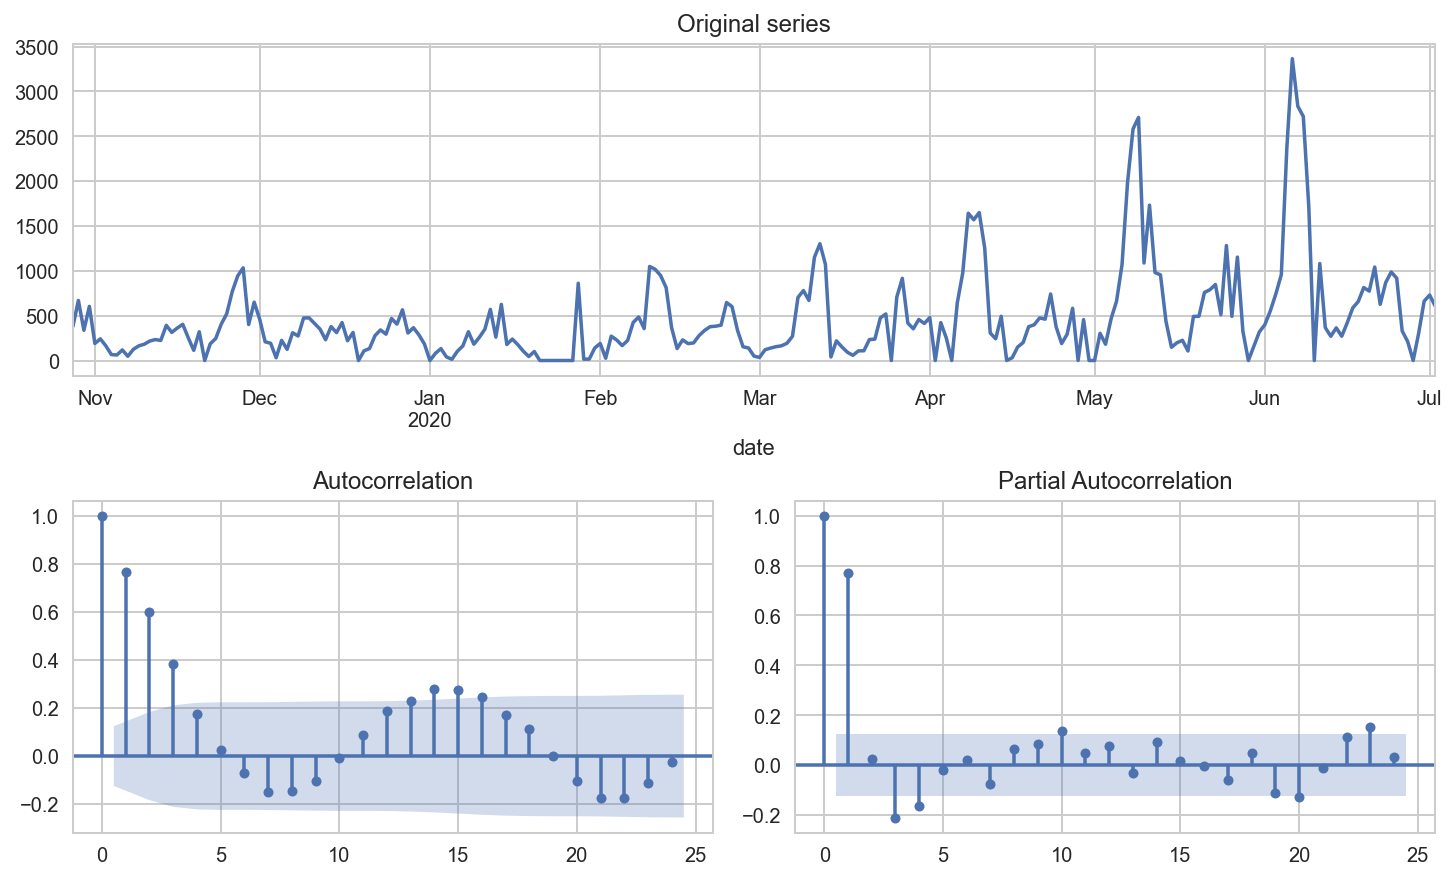

In [64]:
dfQty = pd.read_csv('data/purchase_quantity.csv', index_col='date')
dfQty.index = dfQty.index.astype('datetime64[ns]').to_period('D')
# dfQty = dfQty.asfreq('D')

plot_time_series(dfQty.quantity)

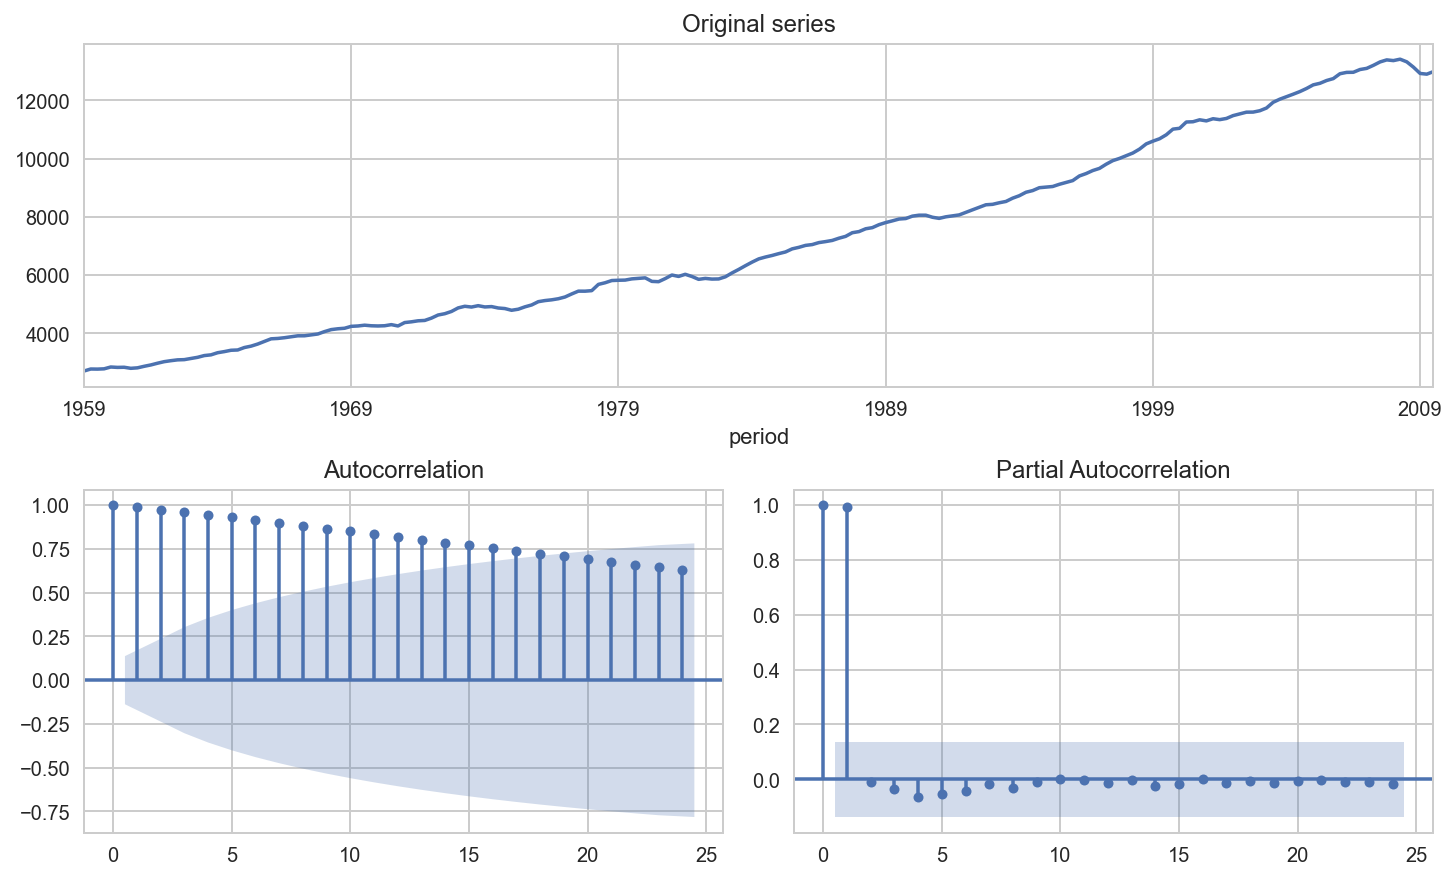

In [88]:
dfEco = pd.read_csv('data/macroeconomics.csv', index_col='period')
dfEco.index = pd.to_datetime(dfEco.index).to_period('Q')

plot_time_series(dfEco.realgdp)

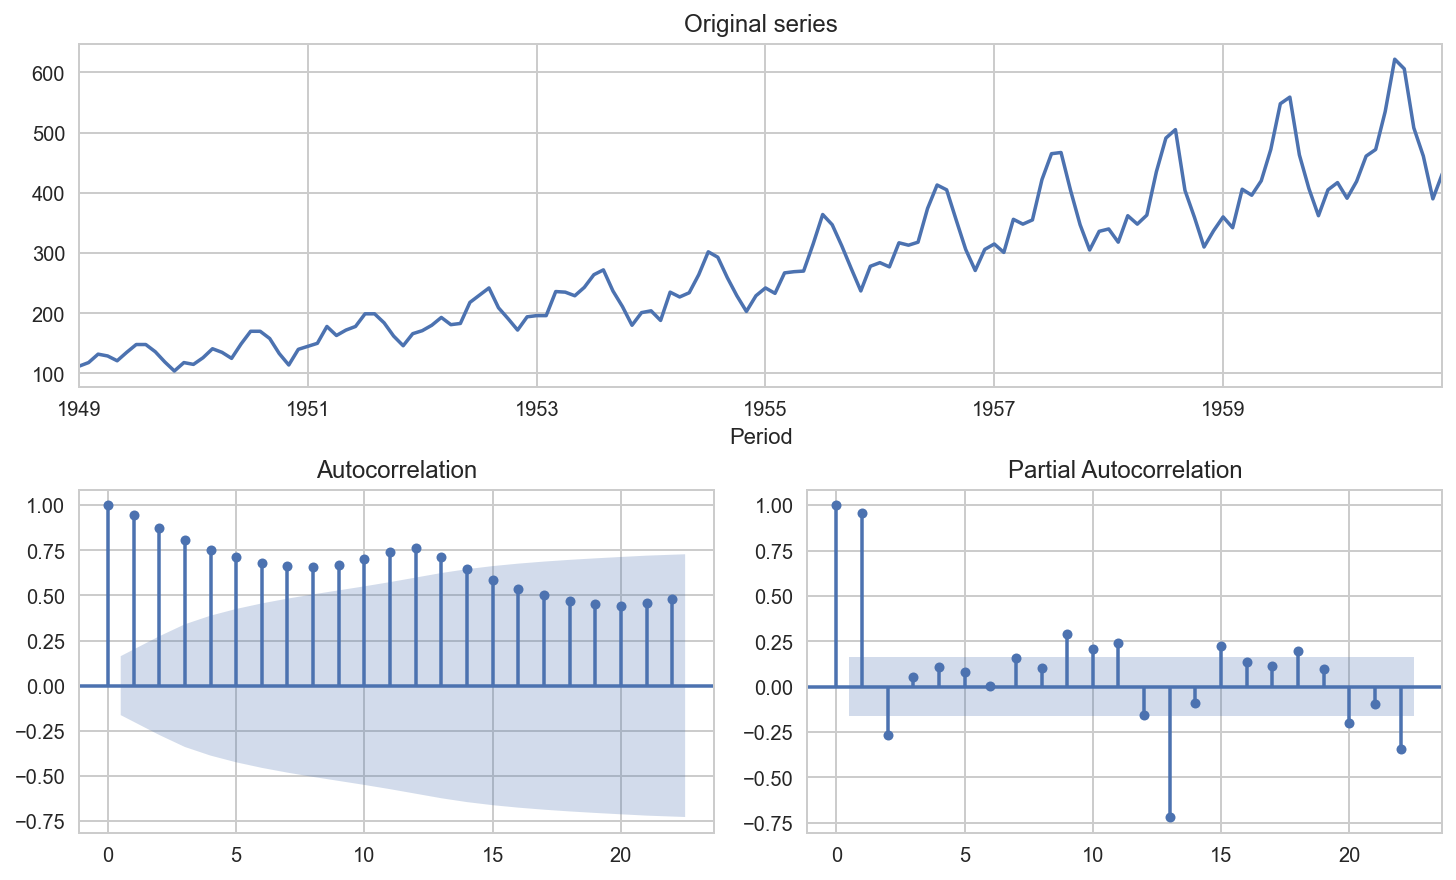

In [118]:
dfAirline = pd.read_csv('data/airline_passengers.csv', index_col='period')
dfAirline.index = dfAirline.index.astype('datetime64[ns]').to_period('M')

plot_time_series(s)

## 2.3. Seasonal decomposition
Time series decompostion is a statistical technique that factorizes data into three components: trend, residual and noise. There are two approaches to achieve this, using an additive model or a multiplicative model, where the original data equals to the sum or the product of its componennts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [2]:
dfQuantity = pd.read_csv('data/purchase_quantity.csv')
dfQuantity = dfQuantity.assign(date=dfQuantity.date.astype('datetime64'))
dfQuantity['quantity'] = dfQuantity.quantity.fillna(1e-6) + 1e-6
dfQuantity.head()

,quantity,date
0,379.490001,2019-10-28
1,669.510001,2019-10-29
2,337.170001,2019-10-30
3,603.740001,2019-10-31
4,189.820001,2019-11-01


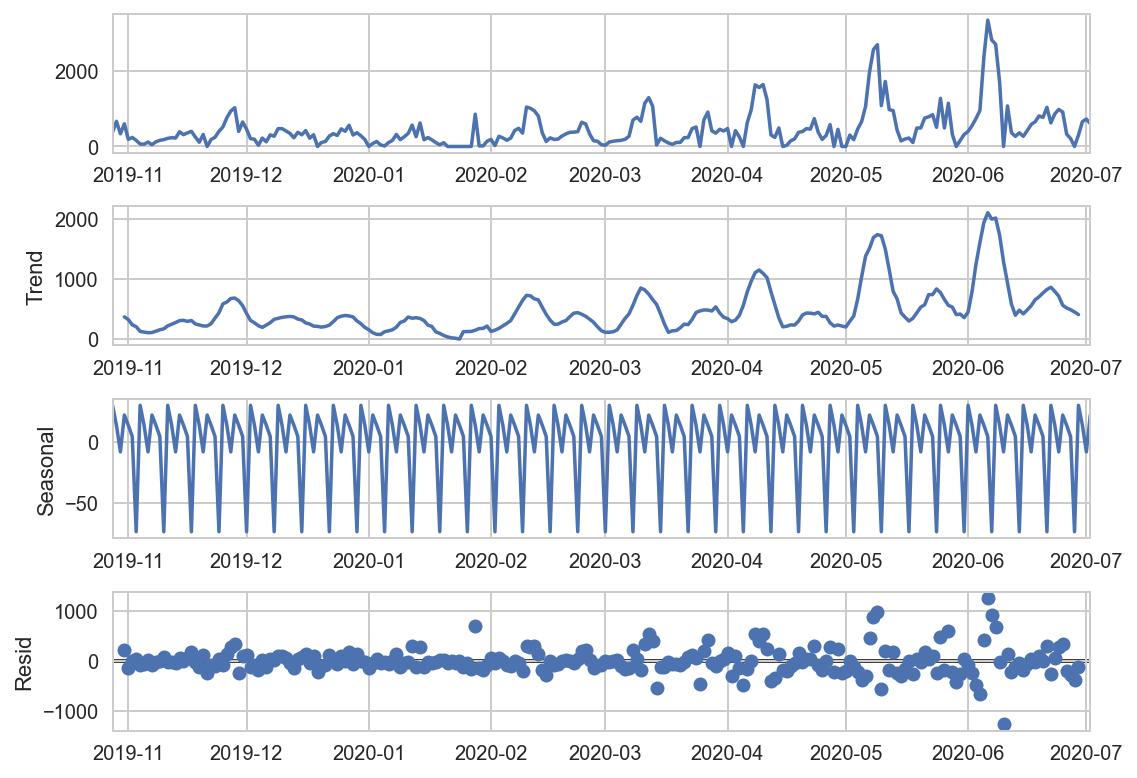

In [3]:
df = dfQuantity.copy()
df = df.set_index('date')
decomposer = seasonal_decompose(df, model='additive', period=7)
decomposer.plot()
plt.show()

In [7]:
decomposer.seasonal.head(7)

date
2019-10-28    29.471737
2019-10-29    13.227030
2019-10-30    -8.377718
2019-10-31    21.559084
2019-11-01    13.299370
2019-11-02     4.106962
2019-11-03   -73.286467
Name: seasonal, dtype: float64

## 2.4. Stationarity
Stationarity refers to a time series whose characteristics do not depends on which time period it is observed. If a time series violates one of these conditions, it is considered non-stationary:
- Constant mean at every timeframe
- Constant variance at every timeframe
- No seasonality

To check whether a time series is stationary, we can look at its line chart. Let's plot some examples:

<img src='image/stationary.png' style='height:500px; margin:20px auto 20px;'>

- Series (d), (h), (i) have seasonality
- Series (a), (c), (e), (f), (i) have trends, thus their means at different periods are not constants
- Series (i) has increasing variance over time
- Ruling out all violated series above leaves only (b) and (g) stationary

### Dickey-Fuller test
Instead of looking at charts, [Agumented Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) test can be used to decide if a series is stationary. The hypotheses:
- $H_0$: data is non-stationary
- $H_1$: data is stationary

The decision making process is: if either p-value < significance level or test statistic < critical value, we reject $H_0$ and conclude that our data is stationary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [7]:
dfQuantity = pd.read_csv('data/purchase_quantity.csv')
dfQuantity = dfQuantity.assign(date=dfQuantity.date.astype('datetime64'))
dfQuantity['quantity'] = dfQuantity.quantity.fillna(1e-6) + 1e-6
quantity = dfQuantity.set_index('date')

In [5]:
def StationaryTest(s):
    from statsmodels.tsa.stattools import adfuller
    stat, pval, _, _, crits, _ = adfuller(s, regression='nc')
    result = pval < 0.05
    
    conclusion = 'stationary' if result else 'non-stationary'
    sign = '<' if result else '>'
    
    mess = f'p-value={pval:6f} {sign} 0.05 | data is {conclusion}'
    print(mess)

In [ ]:
StationaryTest(quantity)

p-value=0.157594 > 0.05 | data is non-stationary


In [ ]:
StationaryTest(np.log(quantity))

p-value=0.000130 < 0.05 | data is stationary


In [ ]:
StationaryTest(quantity.diff(periods=1)[1:])

p-value=0.000000 < 0.05 | data is stationary


### Differencing estimation

In [5]:
import numpy as np
import pandas as pd
from pmdarima.arima import ndiffs

In [4]:
dfQuantity = pd.read_csv('data/purchase_quantity.csv')
dfQuantity = dfQuantity.assign(date=dfQuantity.date.astype('datetime64'))
dfQuantity['quantity'] = dfQuantity.quantity.fillna(1e-6) + 1e-6
quantity = dfQuantity.set_index('date')

In [10]:
ndiffs(quantity, test='kpss') # other test: adf, pp

1

# 3. ARIMA
[ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) (**A**uto**R**egressive **I**ntegrated **M**oving **A**verage) is an statistical model aiming to demonstrate the auto-correlations in time series data. The term *auto* means we are examining the relationship between our series with historical versions of itself (lagged series).

## 3.1. ARIMA model

### ARIMA functions
In a nutshell, ARIMA is a combination of 3 separated processes:

- Integration, $\text{I}(d)$. In this process, the model keeps differencing a time series until it's stationary. The parameter $d$ is the order of differencing and is determined using ADF test. The term *integration* shares the same meaning as summing, which implies the reverse of differencing.

- Auto-Regressive, $\text{AR}(p)$. In this process, we perform a linear regression model where input variables are lagged versions of our data. The parameter $p$ indicates the maximum lag degree and is determined using PACF of a stationary series: when a coefficient suddenly drops to 0, then the corresponding lag is a possible value for $p$. The $\text{AR}(p)$ function is:

$$\begin{align}
\hat{s}_t
&= c+\phi_1s_{t-1}+\phi_2s_{t-2}+\dots+\phi_ps_{t-p} \\
&= c+(\phi_1B+\phi_2B^2+\dots+\phi_pB^p)s_t \\
\end{align}$$

- Moving Average model, $\text{MA}(q)$. It models our time series as a linear combination of past error (denoted $\epsilon$, where $\epsilon_{t-k}=s_{t-k}-\phi s_{t-k-1}$). The parameter $q$ indicates the maximum lag degree and is determined using ACF chart of a stationary series, in a similar decision-making process as for $p$. The $\text{MA}(q)$ functions is:

$$\begin{align}
\hat{s}_t
&= c+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+\dots+\theta_q\epsilon_{t-q} \\
&= c+(\theta_1B+\theta_2B^2+\dots+\theta_qB^q)\epsilon_t \\
\end{align}$$

The entire model $\text{ARIMA}(p,d,q)$ is written as below:

$$(1-B)^d\hat{s}_t=c+(\phi_1B+\phi_2B^2+\dots+\phi_pB^p)(1-B)^ds_t+(\theta_1B+\theta_2B^2+\dots+\theta_qB^q)\epsilon_t$$

### Procedure
- *Estimation*. ARIMA estimates its parameters $c,\phi_1,\phi_2,\dots,\phi_p,\theta_1,\theta_2,\dots,\theta_q$ either by minimizing sum of squared errors (OLS) or by maximizing likelihood (MLE). Both methods return the same result.

- *Point forecasting*. It's obvious, by looking at ARIMA function, that each observation at time $t$ is modeled using previous step $t-1,t-2,\dots$. This prediction is written $\hat{s}_{t|t-1}$. As we have known all values up to time $T$, the forecasting is done in a *recursive* behaviour: $\hat{s}_{T+1|T},\hat{s}_{T+2|T+1},\dots,\hat{s}_{T+h|T+h-1}$.

- *Prediction interval*. Being a regression model, ARIMA assumes that fitted residuals are normally distributed. Thus the confidence interval is given by $z_{\alpha/2}\hat{\sigma}$ where $\alpha$ is significance level and $\hat{\sigma}$ is the standard deviation of residuals. But also note that when the above assumption is not hold, then prediction interval may be incorrect. In practice, a modified version is applied so that prediction intervals increase as the forecasting horizon increases.

### Hyperparameters tuning
The selection of $d$ is very straightforward, thus we put a focus on tuning $p$ and $q$. As described earlier, viable values for $p$ and $q$ can be obtained by looking at PACF and ACF charts of the differenced series, respectively. However, this method usually returns a number of choices rather than guarantees a single optimal selection. Thus we treat it as a tool for limiting potential candidates, then perform greedy search. The objective of exhausted search in ARIMA is to minimize an *information criterion*, which has some options:
- AIC (**A**kaike's **I**nformation **C**riterion)
- BIC (**B**ayesian **I**nformation **C**riterion)
- AICc (**c**orrected **AIC**)

All the above information criteria are constructed of the *loss* part and the *regularization* part. The regularization part prevents the model from adding too many explanatory variables and makes sure the model has a good forecasting power.

## 3.2. Variants
- SARIMA (**S**easonal **ARIMA**) is an extened version of ARIMA for sesonal time series data. The new model is written $\text{ARIMA} (p,d,q) \times (P,D,Q)_m$ where $m$ is sesonal period and $(P,Q,D)$ are seasonal parameters.
- ARIMAX (**ARIMA** with e**X**ogenous variable)

## 3.3. Implementation

In [129]:
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR, SVAR, VARMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HW
from statsmodels.tsa.exponential_smoothing.ets import ETSModel as ETS

from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score as R2

import warnings; warnings.filterwarnings('ignore')

In [130]:
dfQuantity = pd.read_csv('data/purchase_quantity.csv')
dfQuantity = dfQuantity.assign(date=dfQuantity.date.astype('datetime64'))
s = dfQuantity.set_index('date').quantity
s.head()

date
2019-10-28    379.49
2019-10-29    669.51
2019-10-30    337.17
2019-10-31    603.74
2019-11-01    189.82
Name: quantity, dtype: float64

In [131]:
nTest = 30

cutEnd = dfQuantity.shape[0]
cutTest = cutEnd - nTest

xTest, yTest = s[:cutTest], s[cutTest:]

In [134]:
model = SARIMAX(xTest, order=(0,1,0), seasonal_order=(0,1,1,30), trend='t').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             quantity   No. Observations:                  219
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 30)   Log Likelihood               -1362.931
Date:                              Tue, 07 Jun 2022   AIC                           2731.861
Time:                                      16:39:38   BIC                           2741.571
Sample:                                  10-28-2019   HQIC                          2735.795
                                       - 06-02-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0044      0.091      0.048      0.961      -0.173       0.182
ma.S.L30      -0.6024      0.092     -6.527      0.000      -0.783      -0.422
sigma2      1.094e+05   6473.300     16.899      0.000    9.67e+04    1.22e+05
===================================================================================
Ljung-Box (L1) (Q):                  25.09   Jarque-Bera (JB):               303.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.74   Skew:                            -1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
forecaster = model.get_forecast(nTest)
yTestPred = forecaster.predicted_mean.rename('forecast')
dfForecast = yTestPred.to_frame()
dfForecast['truth'] = yTest
listCi = [0.9, 0.95, 0.99]
for ci in listCi:
    strCi = int(ci*100)
    dfCi = forecaster.summary_frame(alpha=1-ci)
    dfCi = dfCi.iloc[:, -2:]
    dfForecast[[f'ci_{strCi}_lower', f'ci_{strCi}_upper']] = dfCi
dfForecast.tail()

,forecast,truth,ci_90_lower,ci_90_upper,ci_95_lower,ci_95_upper,ci_99_lower,ci_99_upper
2020-06-28,579.380992,0.00,-2195.270502,3354.032485,-2726.820185,3885.582168,-3765.703888,4924.465871
2020-06-29,523.334258,304.24,-2304.158566,3350.827082,-2845.831247,3892.499763,-3904.499777,4951.168292
2020-06-30,610.140558,661.91,-2269.224030,3489.505145,-2820.833966,4041.115082,-3898.924297,5119.205412
2020-07-01,636.740589,729.94,-2293.577684,3567.058863,-2854.948997,4128.430176,-3952.117382,5225.598561
2020-07-02,748.354686,608.80,-2232.046284,3728.755657,-2803.012114,4299.721486,-3918.932439,5415.641811


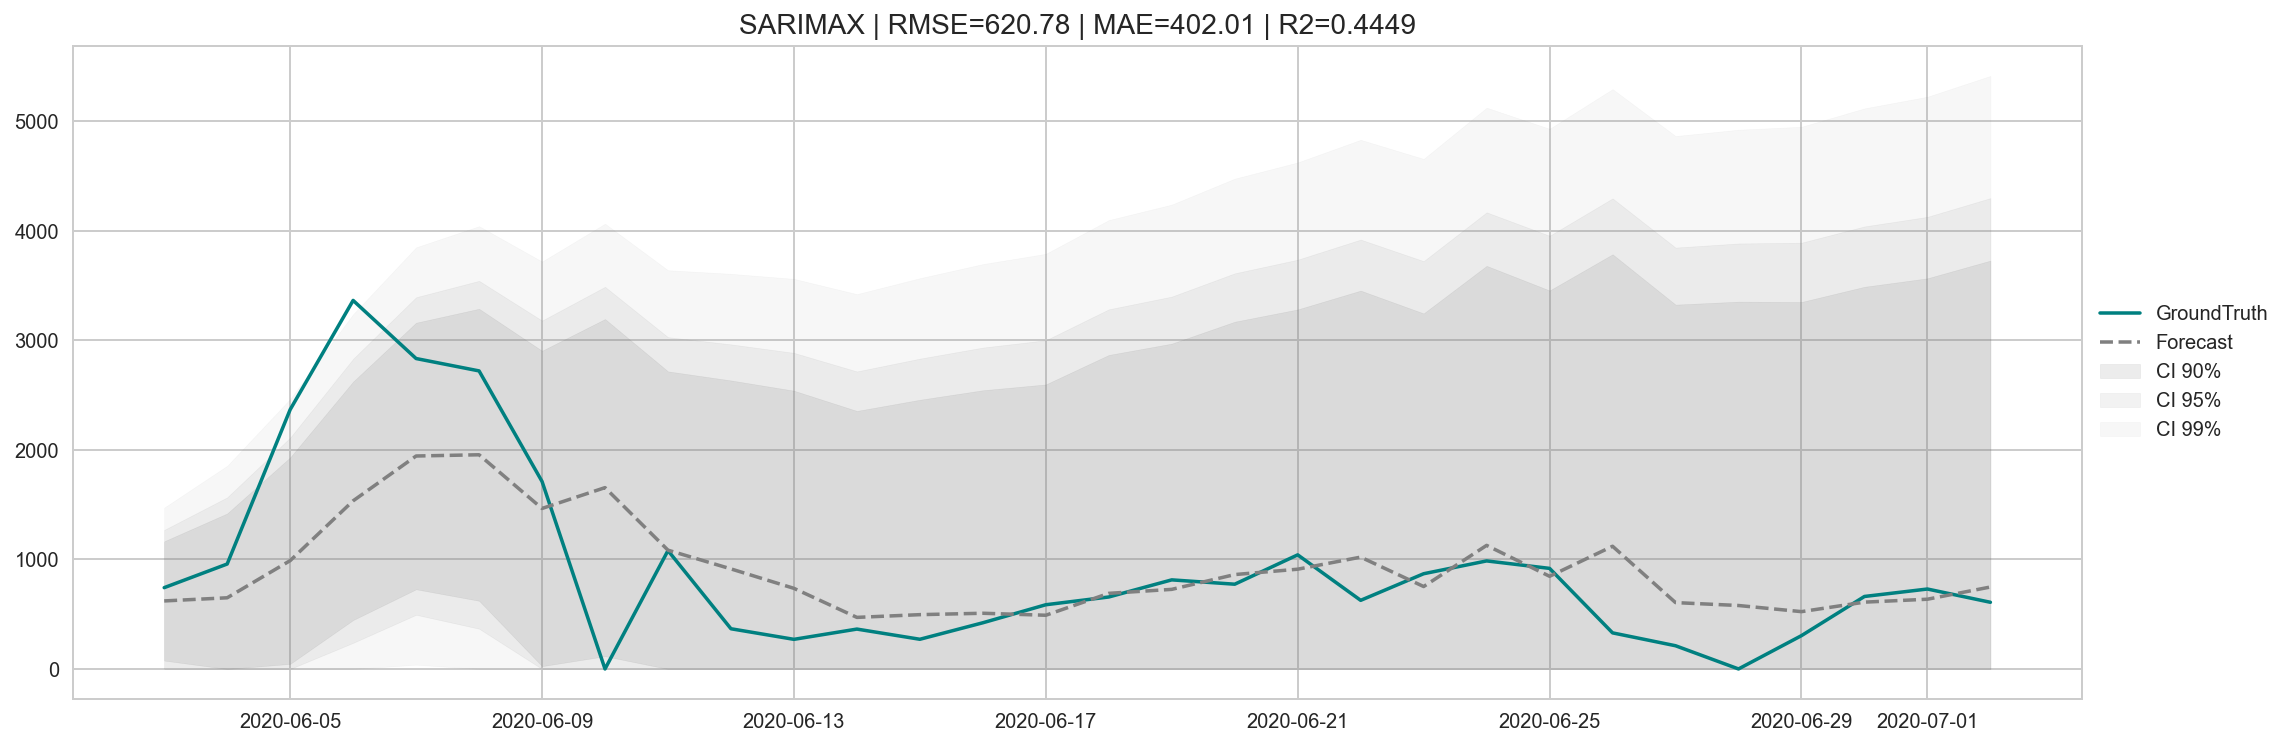

In [138]:
df = dfForecast.copy()
df = df.clip(lower=0)

rmse = MSE(yTest, yTestPred, squared=False)
mae = MAE(yTest, yTestPred)
r2 = R2(yTest, yTestPred)
title = f'SARIMAX | RMSE={rmse:.2f} | MAE={mae:.2f} | R2={r2:.4f}'

fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df.truth, color='teal', label='GroundTruth')
ax.plot(df.forecast, '--', c='grey', label='Forecast')
for ci in listCi:
    alpha = 1 - ci + 0.05
    strCi = int(ci*100)
    lower, upper = df[f'ci_{strCi}_lower'], df[f'ci_{strCi}_upper']
    ax.fill_between(df.index, lower, upper, color='grey', alpha=alpha, label=f'CI {strCi}%')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
ax.set_title(title, fontsize=14)
plt.show()

# 4. ETS
ETS (**E**rror, **T**rend and **S**easonal) is the [state-space](https://www.statsmodels.org/dev/statespace.html) form of Holt-Winters' method, which adds seasonality and trend to the simple *exponetial smoothing* model. The naive method assumes that only most recent observations are the most important ones. Not like ARIMA, ETS forecast a future value using previous observations $y_{t-k}$ instead of using the lagged series $s_{t-k}$.

## 4.1. ETS functions

A method estimated time series based on weight average the past values

**Smoothing level**

$\alpha$ is the parameter which smooth the time series. $\alpha$ is close to 1 means the smoothed series is more like orginal series and opposite

$$\begin{equation}
  \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \cdots,   
\end{equation}$$

Components form:

$$\begin{align*}
  \text{Forecast equation}  && \hat{y}_{t+h|t} & = \ell_{t}\\
  \text{Smoothing equation} && \ell_{t}        & = \alpha y_{t} + (1 - \alpha)\ell_{t-1},
\end{align*}$$

In $\ell_t$ equation, we need $\alpha$ and $\ell_{t-1}$ - called *initial value*. $\alpha$ and $\mbox{initial value}$ are estimated to minimum SSE.

**Smoothing slope**

\begin{align*}
  \text{Forecast equation}&& \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} \\
  \text{Level equation}   && \ell_{t} &= \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  \text{Trend equation}   && b_{t}    &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)b_{t-1},
\end{align*}

- $\ell_{t}$ : an estimate of the level of the series at time $t$
- $b_{t}$ : an estimate of the trend (slope) of the series at time $t$
- $\beta^*$: smoothing parameter for the trend
- $b_{t-1}$: initial value of trend

**Damped Trend**

Orginal trend will be linear shape but in some case, the trend is downward curve form and it called *damping*. Then we add $y_t$ - damping parameter into the model

\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + (\phi+\phi^2 + \dots + \phi^{h})b_{t} \\
  \ell_{t} &= \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + \phi b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)\phi b_{t-1}.
\end{align*}

- If $\phi$ = 1 then the trend is linear
- 0<$\phi$<1 then the trend is reduce to a constant in the future.

**Smoothing seasonal ($\gamma$)**

- Holt-winter's additive method: The seasonal part is the difference between $y_t$ and $\ell_t$

\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} + s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha(y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1}\\
  s_{t} &= \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m},
\end{align*}

- Holt-winter's multiplicative method: The seasonal part is  $\ell_t$ didived by $y_t$

\begin{align*}
  \hat{y}_{t+h|t} &= (\ell_{t} + hb_{t})s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha \frac{y_{t}}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t}-\ell_{t-1}) + (1 - \beta^*)b_{t-1}                \\
  s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + b_{t-1})} + (1 - \gamma)s_{t-m}
\end{align*}

$s_{t}$ : Estimated of seasonal part at the times $t$\
$\gamma$ : Smoothing seasonal. The less $\gamma$ the less change in seasonal by the times.\
$s_{t-m}$ : Initial value of seasonal. The numbers of initial values depend on the numbers of seasonal.

## 4.2. Implementation

In [103]:
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from statsmodels.tsa.exponential_smoothing.ets import ETSModel as ETS

from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score as R2

import warnings; warnings.filterwarnings('ignore')

In [104]:
dfQuantity = pd.read_csv('data/purchase_quantity.csv')
dfQuantity = dfQuantity.assign(date=dfQuantity.date.astype('datetime64'))
s = dfQuantity.set_index('date').quantity
s.head()

date
2019-10-28    379.49
2019-10-29    669.51
2019-10-30    337.17
2019-10-31    603.74
2019-11-01    189.82
Name: quantity, dtype: float64

In [140]:
nTest = 30

cutEnd = dfQuantity.shape[0]
cutTest = cutEnd - nTest

xTest, yTest = s[:cutTest], s[cutTest:]

In [153]:
model = ETS(xTest, trend='add', damped_trend=True, seasonal='add', seasonal_periods=30, freq='D').fit()
result = model.summary().tables

In [142]:
result[0]

Dep. Variable:,quantity,No. Observations:,219
Model:,ETS(AAdA),Log Likelihood,-1529.151
Date:,"Tue, 07 Jun 2022",AIC,3132.302
Time:,16:43:02,BIC,3257.698
Sample:,10-28-2019,HQIC,3182.946
,- 06-02-2020,Scale,67980.277
Covariance Type:,approx,,


In [143]:
result[2]

Ljung-Box (Q):,70.89,Jarque-Bera (JB):,196.46
Prob(Q):,0.00,Prob(JB):,0.00
Heteroskedasticity (H):,3.24,Skew:,-0.58
Prob(H) (two-sided):,0.00,Kurtosis:,7.49


In [147]:
forecaster = model.get_prediction(cutTest, cutEnd-1)
yTestPred = forecaster.predicted_mean.rename('forecast')
dfForecast = yTestPred.to_frame()
dfForecast['truth'] = yTest
listCi = [0.9, 0.95, 0.99]
for ci in listCi:
    strCi = int(ci*100)
    dfCi = forecaster.summary_frame(alpha=1-ci)
    dfCi = dfCi.iloc[:, -2:]
    dfForecast[[f'ci_{strCi}_lower', f'ci_{strCi}_upper']] = dfCi
dfForecast.tail()

,forecast,truth,ci_90_lower,ci_90_upper,ci_95_lower,ci_95_upper,ci_99_lower,ci_99_upper
2020-06-28,505.658104,0.00,-934.301371,1945.617578,-1210.159440,2221.475647,-1749.308387,2760.624594
2020-06-29,415.254539,304.24,-1050.717878,1881.226956,-1331.559337,2162.068415,-1880.448038,2710.957116
2020-06-30,467.350354,661.91,-1024.181410,1958.882118,-1309.919363,2244.620071,-1868.377982,2803.078690
2020-07-01,409.722661,729.94,-1106.937785,1926.383108,-1397.489727,2216.935050,-1965.357015,2784.802338
2020-07-02,510.193281,608.80,-1031.186243,2051.572805,-1326.473705,2346.860268,-1903.596300,2923.982862


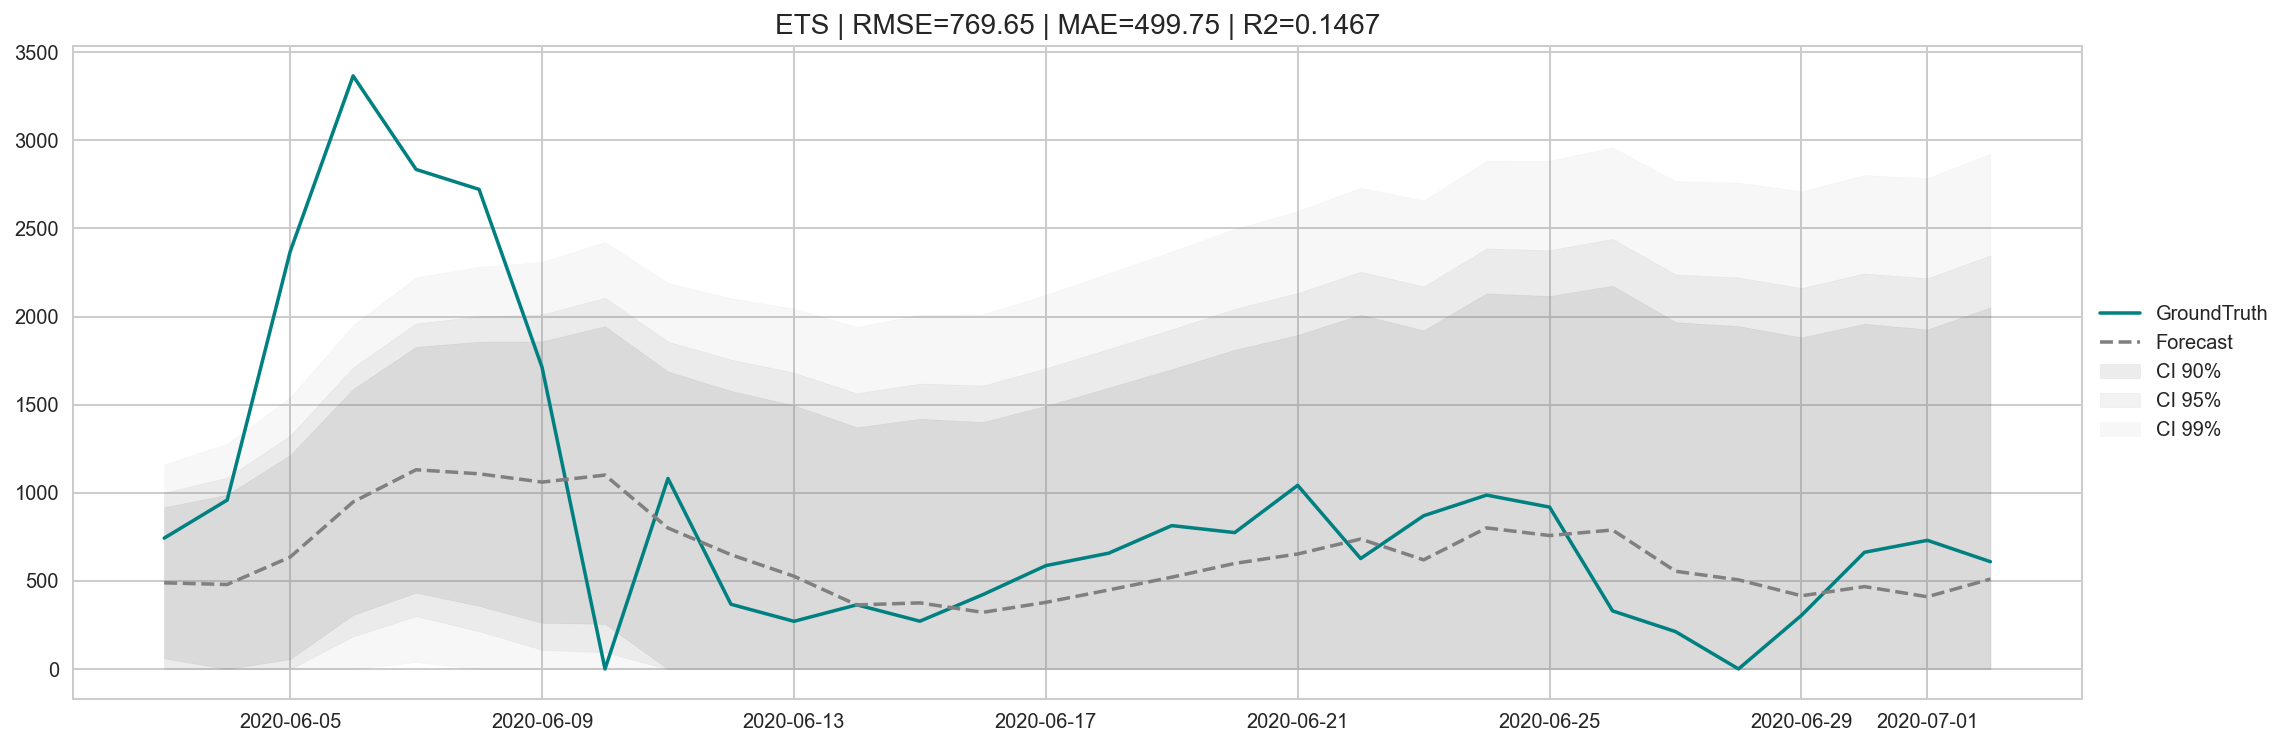

In [150]:
df = dfForecast.copy()
df = df.clip(lower=0)

rmse = MSE(yTest, yTestPred, squared=False)
mae = MAE(yTest, yTestPred)
r2 = R2(yTest, yTestPred)
title = f'ETS | RMSE={rmse:.2f} | MAE={mae:.2f} | R2={r2:.4f}'

fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df.truth, color='teal', label='GroundTruth')
ax.plot(df.forecast, '--', c='grey', label='Forecast')
for ci in listCi:
    alpha = 1 - ci + 0.05
    strCi = int(ci*100)
    lower, upper = df[f'ci_{strCi}_lower'], df[f'ci_{strCi}_upper']
    ax.fill_between(df.index, lower, upper, color='grey', alpha=alpha, label=f'CI {strCi}%')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
ax.set_title(title, fontsize=14)
plt.show()

# 5. VAR
[VAR](https://en.wikipedia.org/wiki/Vector_autoregression) (**V**ector **A**uto**R**egression)

## 5.1. VAR Model

A VAR model is a generalisation of the univariate autoregression model for forcasting a vector of time series. In VAR model, all variables are treated symmetrically - all of them are *endogenous*. The structure of VAR is each variable is a linear function of past lags of itself and past lags of the other variables.

*Explaination:*

Example with 2 variables:
$$a_t = c_1 + \sum_{j=1}^{j=p} A_j a_{t-j} + \sum_{j=1}^{j=p} B_j b_{t-j} + e_{1,t} \\
  b_t = c_2 + \sum_{j=1}^{j=p} D_j a_{t-j} + \sum_{j=1}^{j=p} E_j b_{t-j} + e_{2,t}$$
  
- Two equations contains only its own lagged values and the lagged value of others variables - no current values of two variables on right-hand sides.
- Although the number of lagged values of each variable can be different, in most cases we use the same number of lagged terms in each equation.
- The model above is called $\mbox{VAR(p)}$ because of $p$ lagged values of each variable. 

*The general form of VAR: The function of VAR is actually the OLS method with stationary time series*:

$$y_t = c + A_1 y_{t-1} + A_2 y_{t-2}+\cdots +A_p y_{t-p}+e_{t}$$

$A_i$: Square matrix $m*m, i=1,2,\dots,p$\
$y_t$: $m$ stationary variables $y_{1t}, y_{2t},\dots, y_{mt}$\
$e_t$: vector of white noise

*The work flow:*

Step 1: Check the stationary of all time series. We have 2 possibilities:
- If all variables are stationary, we can estimated VAR model by OLS
- If all variables are I(1), make them stationary and move to step 2:

Step 2: Find the lag $p$ for model. Depend on metric $\mbox{AIC}$, $\mbox{FPE}$, $\mbox{SC}$ and $\mbox{HQIC}$ - The lag reach the largest numbers of minimum metrics will be the lag for model.

Step 3: Estimated the VAR model by OLS.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

plt.style.use(['seaborn', 'seaborn-whitegrid'])
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [46]:
dfCpi = pd.read_csv('data/cpi.csv')
dfCpi = dfCpi.astype({'month': 'datetime64'})
dfCpi = dfCpi.set_index('month')
dfCpi.head()

,ex_rate,money_supply,inf
month,,,
2009-01-01,16954,1.582872e+06,15.536579
2009-02-01,16953,1.722413e+06,6.701754
2009-03-01,16991,1.830077e+06,2.417558
2009-04-01,17941,1.914078e+06,4.602838
2009-05-01,18544,1.964660e+06,9.696635


In [47]:
for i in dfCpi.columns:
    test = adfuller(dfCpi[i])
    print(f'ADF of {i}: {test[0]}')
    print(f'p-value of {i}: {test[1]}')

ADF of ex_rate: -2.6047933525515283
p-value of ex_rate: 0.09201062038116359
ADF of money_supply: 3.857985254022738
p-value of money_supply: 1.0
ADF of inf: -1.554106971814962
p-value of inf: 0.5065960721917747


In [48]:
dfCpiDif = dfCPI.diff().dropna()

for i in dfCpiDif.columns:
    test = adfuller(dfCpiDif[i])
    print(f'ADF of {i}: {test[0]}')
    print(f'p-value of {i}: {test[1]}')

ADF of ex_rate: -6.723311823514879
p-value of ex_rate: 3.4392095149141533e-09
ADF of money_supply: -4.971584105329942
p-value of money_supply: 2.5253803145699296e-05
ADF of inf: -5.33587795514765
p-value of inf: 4.612428921750133e-06


In [49]:
var = VAR(dfCpiDif)
result = var.fit(maxlags=4, ic='aic', verbose=True)
result.summary()

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 1, FPE -> 4, HQIC -> 1>
Using 4 based on aic criterion


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 26, Jul, 2021
Time:                     21:51:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    37.1056
Nobs:                     39.0000    HQIC:                   36.0390
Log likelihood:          -818.136    FPE:                2.67178e+15
AIC:                      35.4421    Det(Omega_mle):     1.12716e+15
--------------------------------------------------------------------
Results for equation ex_rate
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                 171.053850       261.584879            0.654           0.513
L1.ex_rate             -0.126433         0.163305           -0.774           0.439
L1.money_supply        -0.000224         0.000543 

In [50]:
lags = result.k_ar

inf_pred = result.forecast(dfCpiDif[-lags:].values, steps=15)[:,2:3]
inf_pred = dfCpiDif['inf'].iloc[-1] + inf_pred.cumsum()
inf_pred

array([3.23590418, 3.29835561, 3.04879665, 3.49792176, 3.63751891,
       3.59901505, 3.78114786, 3.67908554, 3.62580333, 3.81903495,
       3.86660551, 3.88287442, 3.93823976, 3.89078186, 3.8963528 ])

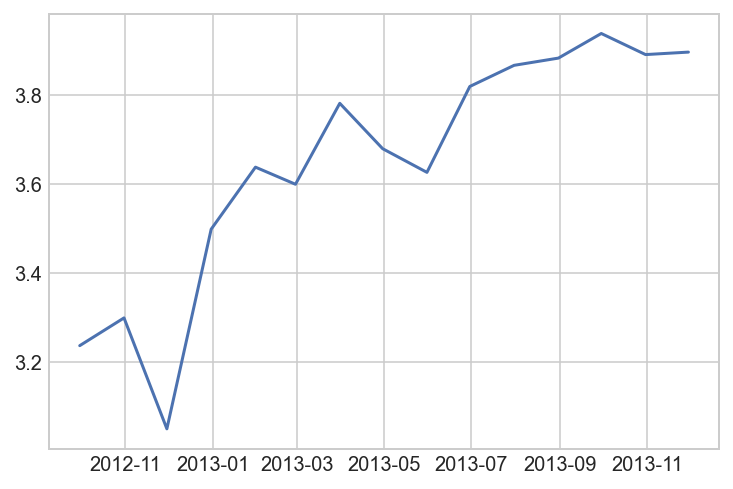

In [51]:
date = pd.date_range(start='2012-09-01', periods=15, freq='M')
dfPred = pd.DataFrame(inf_pred, index=date, columns=['inf'])

plt.plot(dfPred)
plt.show()

# References
- [Ebook] [Forecasting: Principles and Practice](https://otexts.com/fpp3/)
- [Ebook] [Forecasting and Analytics with Adam](https://www.openforecast.org/adam/)
- [Ebook] [STAT 510: Applied Time Series Analysis](https://online.stat.psu.edu/stat510/)

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*